# Задание 1

In [1]:
import matplotlib.pyplot as plt
from scipy.datasets import face
import numpy as np

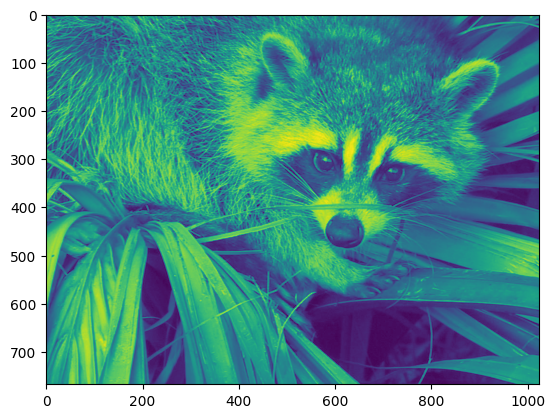

In [2]:

img = face(gray=True)
img1 = img.copy()
plt.imshow(img)

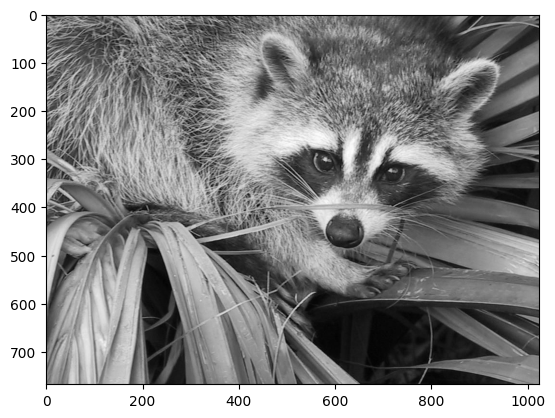

In [3]:
plt.imshow(img, cmap=plt.cm.gray) 

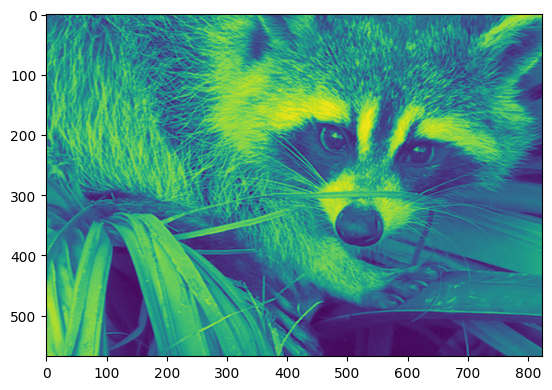

In [4]:
plt.imshow(img[100:-100,100:-100])

In [5]:
sy, sx = img.shape
y, x = np.ogrid[0:sy, 0:sx] 
y.shape, x.shape

((768, 1), (1, 1024))

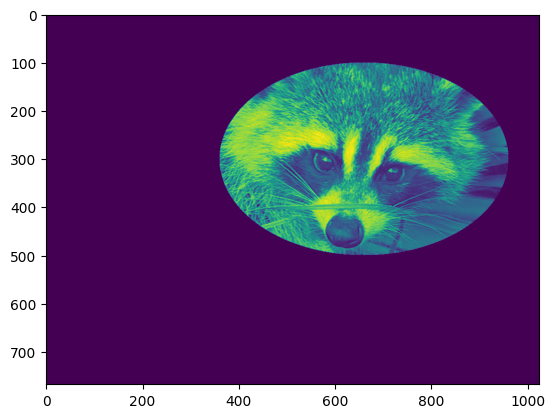

In [6]:
centerx, centery = (660, 300) 
a = 300
b = 200
mask = (((x - centerx)**2 / a**2) + ((y - centery)**2 / b**2)) > 1
img[mask] = 0
plt.imshow(img)  

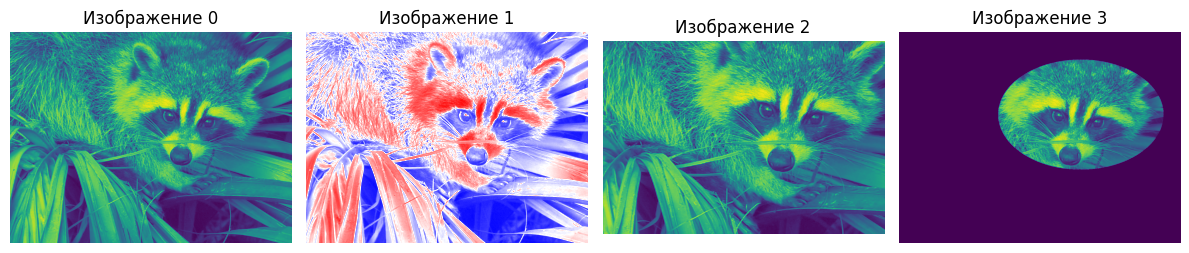

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))  

axes[0].imshow(img1)
axes[0].set_title("Изображение 0")
axes[0].axis('off')  


axes[1].imshow(img1, cmap=plt.cm.bwr)
axes[1].set_title("Изображение 1")
axes[1].axis('off')  

axes[2].imshow(img1[100:-100,100:-100])
axes[2].set_title("Изображение 2")
axes[2].axis('off')

axes[3].imshow(img)
axes[3].set_title("Изображение 3")
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Задание 2

In [8]:
import urllib.request
from io import StringIO


In [9]:
url = "https://scipy-lectures.org/_downloads/populations.txt"
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8')

array = np.loadtxt(StringIO(data))
print(array)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [10]:
year, hares, lynxes, carrots = array.T
population = array[:,1:]

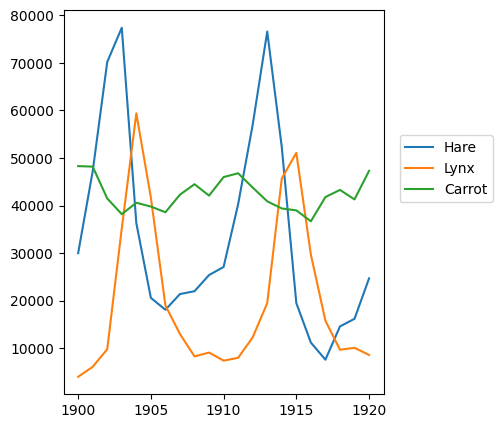

In [11]:
plt.axes([0.2, 0.1, 0.5, 0.8]) 

plt.plot(year, hares, year, lynxes, year, carrots) 

plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

In [12]:
print("       Hares,         Lynxes,         Carrots")
print("Mean:", population.mean(axis=0))
print("Std:", population.std(axis=0))

       Hares,         Lynxes,         Carrots
Mean: [34080.95238095 20166.66666667 42400.        ]
Std: [20897.90645809 16254.59153691  3322.50622558]


In [13]:
max_years = np.argmax(population, axis=0)
print("Max years: ", year[max_years])

Max years:  [1903. 1904. 1900.]


In [14]:
max_pop = np.argmax(population, axis=1)
pop = np.array(['H','L','C'])
print("Years: ", year)
print(pop[max_pop])

Years:  [1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']


In [15]:
above_50_000 = np.any(population > 50_000, axis=1)
print("Any above 50_000", year[above_50_000])

Any above 50_000 [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


In [16]:
top_2_years = np.argsort(population, axis=0)[:2]
print("Top 2 years with lowest population for every species")
print(year[top_2_years])

Top 2 years with lowest population for every species
[[1917. 1900. 1916.]
 [1916. 1901. 1903.]]


In [17]:
hare_grad = np.gradient(hares, 1.0)
print("Diff(Hares) vs Lynx corr", np.corrcoef(hare_grad,lynxes)[0,1])

Diff(Hares) vs Lynx corr -0.9179248480315341


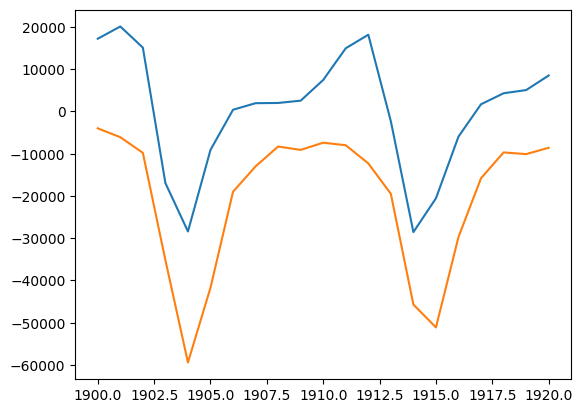

In [18]:
plt.plot(year, hare_grad,year, -lynxes)

# Задание 3

In [19]:
from numpy import newaxis

In [20]:
def compute_mandelbrot(N_max, some_threshold, nx, ny):
    x= np.linspace(-2,1, nx)
    y=np.linspace(-1.5,1.5, ny)

    c=x[:,newaxis]+1j*y[newaxis, :]

    z = c
    for j in range(N_max):
        z=z**2+c
    mandelbrot_set = (abs(z) < some_threshold)   

    return mandelbrot_set

In [21]:
mandelbrot_set = compute_mandelbrot(500,50,1201,801)

/var/folders/cw/fvky6lcd1fq2kp8_tfxlc3hw0000gn/T/ipykernel_39101/2739786544.py:9: RuntimeWarning: overflow encountered in square
  z=z**2+c
/var/folders/cw/fvky6lcd1fq2kp8_tfxlc3hw0000gn/T/ipykernel_39101/2739786544.py:9: RuntimeWarning: invalid value encountered in square
  z=z**2+c


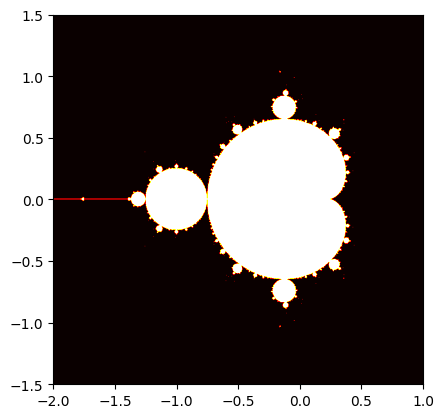

In [22]:
plt.imshow(mandelbrot_set.T, extent=[-2,1,-1.5,1.5],cmap="hot")

# Задание 4
Абсолютно не уверен в правильности своих действий*

In [23]:
import numpy as np

In [32]:
def generate_matrix(n):
    P = np.random.rand(n, n)
    P = P / P.sum(axis=1, keepdims=True)
    
    return P

In [33]:
def compute_p(P, p_initial, N):
    p = p_initial
    for _ in range(N):
        p = P.T.dot(p)
    return p

In [34]:
def stat_distr(P):
    P_T = P.T
    
    eigen_values, eigen_vectors = np.linalg.eig(P_T)
    index = np.isclose(eigen_values, 1)
    
    stat_vector = eigen_vectors[:, index].flatten()
    stat_vector = stat_vector / stat_vector.sum()
    
    return stat_vector

In [35]:
n = 5
P = generate_matrix(n)
p_initial = np.random.rand(n)
p_initial = p_initial / p_initial.sum()
N = 50
p_50 = compute_p(P, p_initial, N)
p_stationary = stat_distr(P)
print("p_50:", p_50)
print("p_stationary:", p_stationary)
print("Разница между p_50 и p_stationary:", np.linalg.norm(p_50 - p_stationary))
print("p_50 и p_stationary одинаковы? :", np.allclose(p_50, p_stationary, atol=1e-5))

p_50: [0.12879448 0.32809796 0.24426635 0.16002978 0.13881143]
p_stationary: [0.12879448-0.j 0.32809796-0.j 0.24426635-0.j 0.16002978-0.j
 0.13881143-0.j]
Разница между p_50 и p_stationary: 1.4607978567827436e-15
p_50 и p_stationary одинаковы? : True


# Задание 5
Получилось что-то похожее, хотя с графиком показанном в задании не совпадает...

In [28]:
from scipy.integrate import solve_ivp

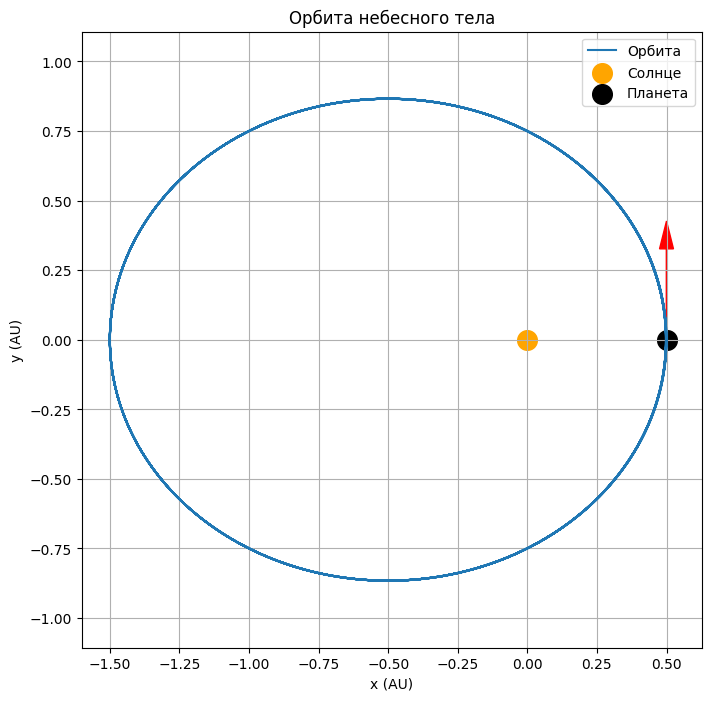

In [29]:
a = 1.0  
e = 0.5
GM = 4 * np.pi**2  


r_p = a * (1 - e)  
v_p = np.sqrt(GM / a * (1 + e) / (1 - e))  


Y0 = [r_p, 0, 0, v_p]
def rhs(t, Y, GM=GM):
    x, y, vx, vy = Y
    f = np.zeros_like(Y)
    r = np.sqrt(x**2 + y**2)
    
    f[0] = vx
    f[1] = vy
    f[2] = -GM * x / r**3
    f[3] = -GM * y / r**3
    return f


t_span = (0, 10)  # Годы
t_eval = np.linspace(*t_span, 1000)  # 1000 точек для интегрирования

sol = solve_ivp(rhs, t_span, Y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)


x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]

plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Орбита')
plt.scatter(0, 0, color='orange', label='Солнце', s=200)  
plt.scatter(r_p, 0, color='black', label='Планета', s=200)  
plt.arrow(r_p, 0, vx[0] * 0.1, vy[0] * 0.03, head_width=0.05, head_length=0.1, fc='red', ec='red')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Орбита небесного тела')
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

# 5.1
Попытался сделать график эксцентриситета приложенного в задании. Из далека вроде похоже...

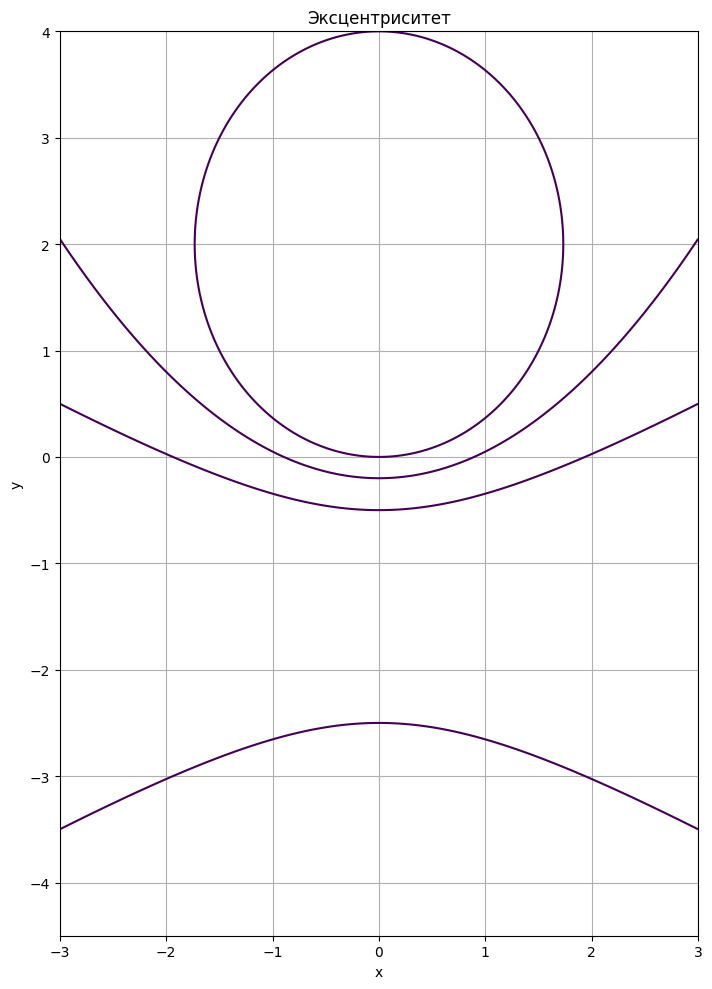

In [30]:
def compute_e(ax, e, c, offset_x=0, offset_y=0):
    
    F = (offset_x, offset_y + c)  
    directrix = offset_y - c / e  

    
    x = np.linspace(-3, 3, 500) + offset_x
    y = np.linspace(-4, 4, 500) + offset_y
    X, Y = np.meshgrid(x, y)
    
    
    distance_focus = np.sqrt((X - F[0])**2 + (Y - F[1])**2)
    distance_directrix = e * np.abs(Y - directrix)
    conic = distance_focus - distance_directrix

    ax.contour(X, Y, conic, levels=[0]) 



fig, ax = plt.subplots(figsize=(10, 10))

compute_e(ax, e=0.5, c=1, offset_x=0, offset_y=0)
compute_e(ax, e=1.0, c=1, offset_x=0, offset_y=-0.2)
compute_e(ax, e=2.0, c=1, offset_x=0, offset_y=-0.5)


ax.set_title("Эксцентриситет")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', adjustable='box')  
ax.grid(True)


plt.tight_layout()
plt.show()


# 5.2
Это пытался поиграться с анимацией и добиться чего-то сносного. Игрался над заданием функции и тп, но все равно какая-то фигня вышла.
Код также приложу отдельным файлом(testAnimation.py), тк тут не хочет воспроизводить анимации.

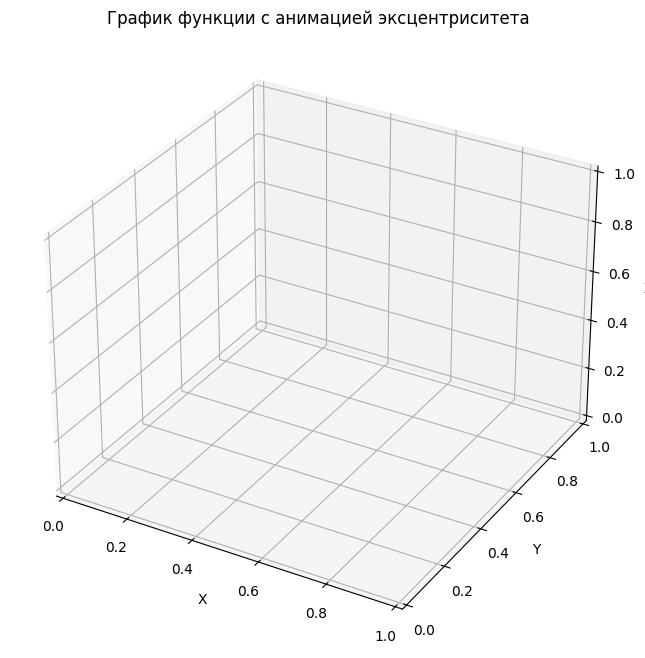

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation



def surface(x, y, e):
    a = 2  
    if e < 1:  # Эллипс
        b = a * np.sqrt(1 - e**2)
    elif e == 1:  # Парабола
        b = a  
    else:  # Гипербола
        b = a * np.sqrt(e**2 - 1)

    
    if e < 1:
        z = x**2 / a**2 + y**2 / b**2 - 1  # Эллипс
    elif e == 1:
        z = y**2 - x**2  # Парабола
    else:
        z = x**2 / a**2 - y**2 / b**2 - 1  # Гипербола
    return z



fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection="3d")


x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)


ax.set_title("График функции с анимацией эксцентриситета")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


# Функция для обновления графика на каждом кадре
def update(t):
    ax.cla()  
    e = t  
    Z = surface(X, Y, e)  # Вычисляем новые значения Z с учетом эксцентриситета
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")  
    ax.set_title(f"Эксцентриситет: e = {e:.2f}")  
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_zlim(-2, 2)  
    return []



ani = FuncAnimation(fig, update, frames=np.linspace(0, 2, 100), interval=500)
plt.show()
